# Principal Component Analysis of Wine Classes using Python and Sklearn

The purpose of this analysis to show the efficacy of PCA when it comes to analyzing the correlation of features with their respective classes. We will first examine our data and determine the top features that may classify the wine. We will then visualize our data to observe any other possible correlations. Next, we will scale our data, and apply PCA to explain the variance ration of the vectors. Finally, we will transform our scaled data, and plot to visualize and show the class separation using principal component analysis.

Dataset imported from https://archive.ics.uci.edu/ml/datasets/wine

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )

1) Alcohol 

2) Malic acid 

3) Ash 

4) Alcalinity of ash 

5) Magnesium 

6) Total phenols 

7) Flavanoids 

8) Nonflavanoid phenols 

9) Proanthocyanins 

10)Color intensity 

11)Hue 

12)OD280/OD315 of diluted wines 

13)Proline 

### Import libraries and datasets

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv('wine.data.csv')
df.columns = ['class','alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins','color_intensity','hue','OD280/OD315_of_dil_wines','proline']

### Exploratory Data Analysis of the Dataset

In [20]:
df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_dil_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [21]:
df.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_dil_wines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
class                       177 non-null int64
alcohol                     177 non-null float64
malic_acid                  177 non-null float64
ash                         177 non-null float64
alcalinity_of_ash           177 non-null float64
magnesium                   177 non-null int64
total_phenols               177 non-null float64
flavanoids                  177 non-null float64
nonflavanoid_phenols        177 non-null float64
proanthocyanins             177 non-null float64
color_intensity             177 non-null float64
hue                         177 non-null float64
OD280/OD315_of_dil_wines    177 non-null float64
proline                     177 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.4 KB


### Expolore the variance in the columns based on wine class

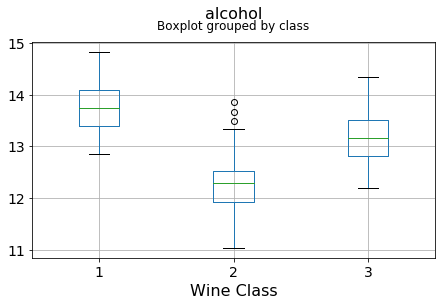

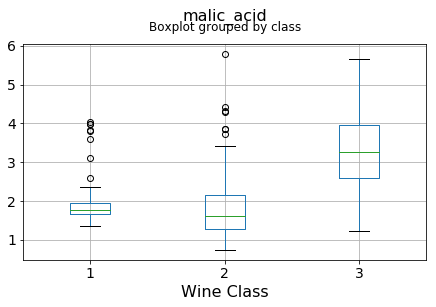

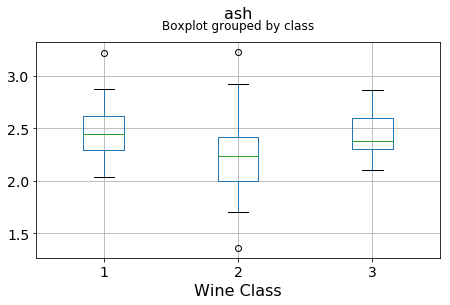

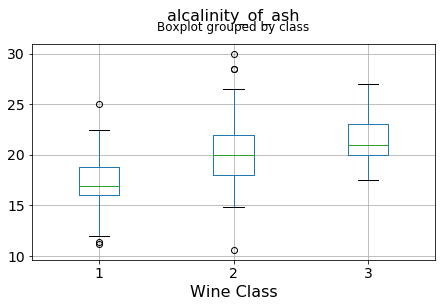

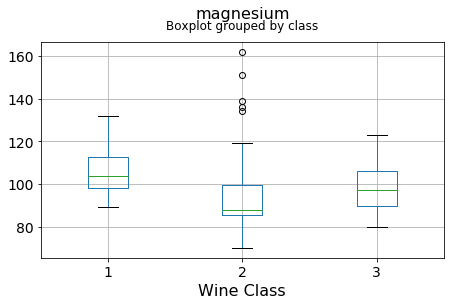

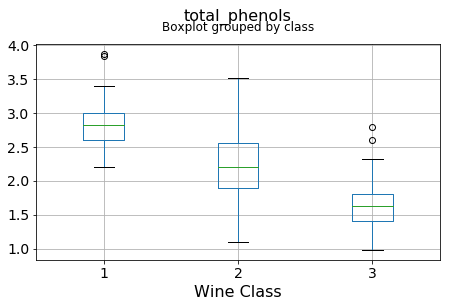

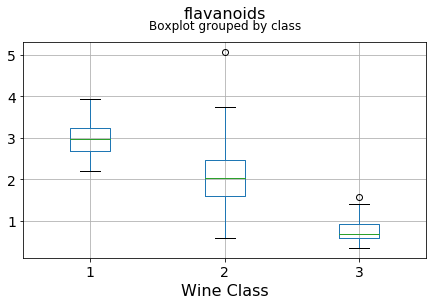

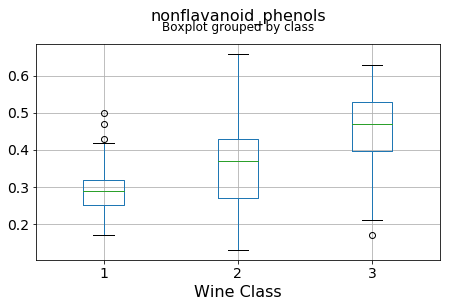

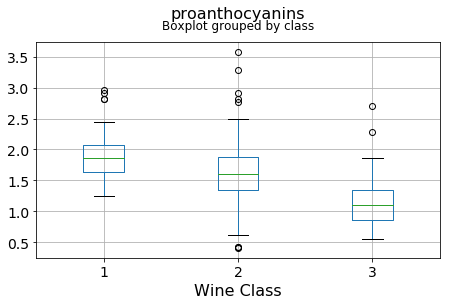

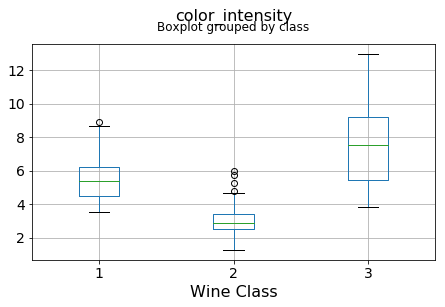

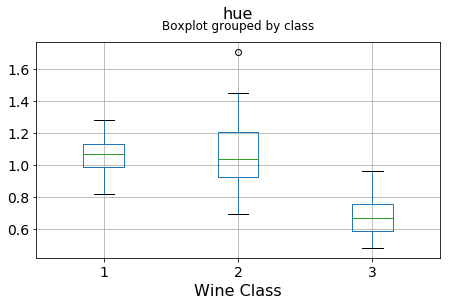

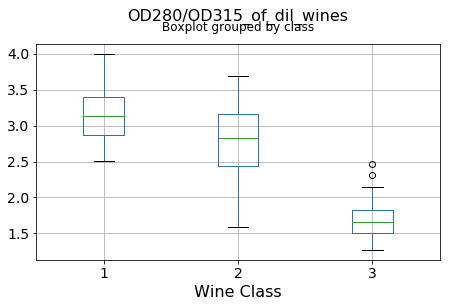

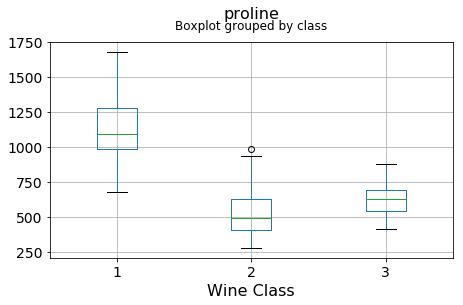

In [24]:
for c in df.columns[1:]:
    df.boxplot(c,by='class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

Scatter plot of the top two features that show distinct median separation between classes

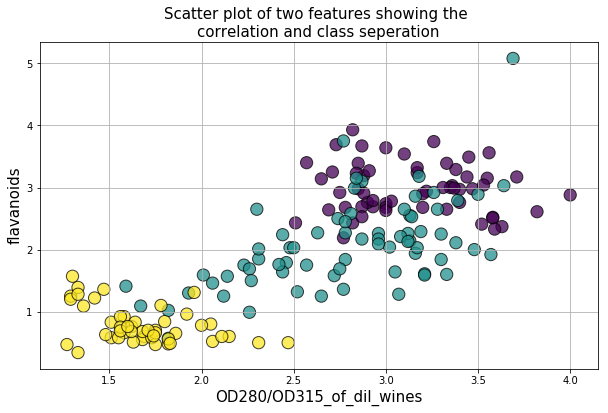

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315_of_dil_wines'],df['flavanoids'],c=df['class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315_of_dil_wines",fontsize=15)
plt.ylabel("flavanoids",fontsize=15)
plt.show()

Create a correlation matrix between all features

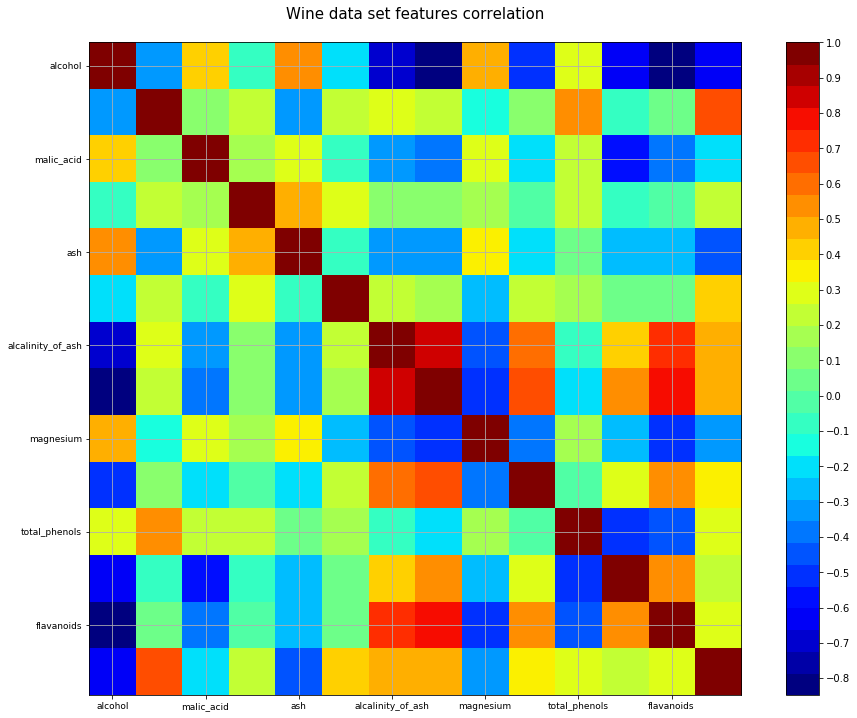

In [28]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

### Principal Component Analysis

Scaling Data using StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
X = df.drop('class',axis=1)
y = df['class']

X = scaler.fit_transform(X)

dfx = pd.DataFrame(data=X,columns=df.columns[1:])


C:\Users\salkhali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\salkhali\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
dfx.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_dil_wines,proline
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965
5,1.731299,-0.420990,0.305655,-1.478055,-0.253827,0.332548,0.498632,-0.501337,0.689650,0.084214,0.275801,1.387704,1.735400
6,1.322133,-0.170127,0.888953,-0.576243,1.514967,0.492626,0.488590,-0.420887,-0.591214,-0.002072,0.450866,1.387704,1.751324
7,2.276852,-0.627056,-0.715117,-1.658418,-0.183075,0.812784,0.960557,-0.581788,0.689650,0.062643,0.538398,0.349457,0.955129
8,1.074155,-0.886878,-0.350556,-1.057210,-0.112323,1.100925,1.131268,-1.144940,0.461551,0.934132,0.232035,1.345036,0.955129
9,1.371729,-0.161168,-0.241187,-0.456001,0.382939,1.052902,1.301980,-1.144940,1.391493,0.299929,1.282424,0.804579,2.436052


In [34]:
dfx.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_dil_wines,proline
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-2.609338e-16,4.252719e-16,-4.378168e-16,-6.410440e-16,-1.028681e-16,-1.279579e-16,1.505387e-16,-5.595022e-16,5.645202e-17,1.568112e-16,6.310081e-16,6.335171e-16,2.389802e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


### PCA class Analysis

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(dfx)

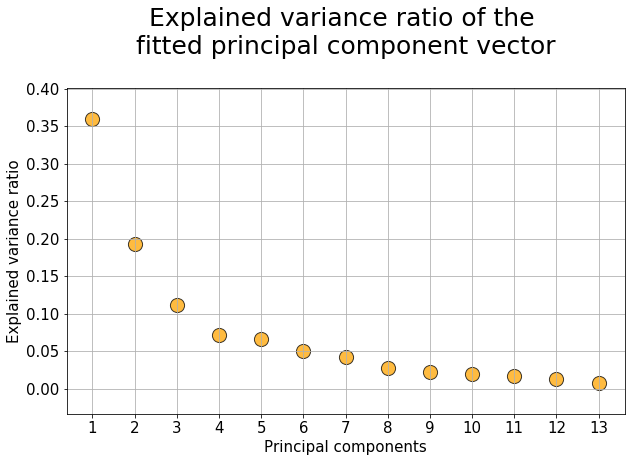

In [37]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

Transform Scaled Data using fitter PCA object

In [39]:
dfx_trans = pca.transform(dfx)
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.230243,0.302313,-2.032920,-0.281906,-0.259540,-0.927615,0.079724,1.026470,-0.313145,0.131256,-0.153252,0.401035,0.001901
1,2.531922,-1.062257,0.976724,0.735727,-0.198602,0.557252,0.432350,-0.335611,-1.179069,0.006752,-0.275374,0.003380,0.021606
2,3.754677,-2.805309,-0.180370,0.577125,-0.257871,0.100109,-0.364924,0.646847,0.067906,0.373320,0.696435,-0.241100,-0.370466
3,1.020131,-0.888380,2.023870,-0.432792,0.275235,-0.403139,0.454721,0.412033,0.338059,-0.096320,-0.541460,-0.187797,-0.081820
4,3.049199,-2.170007,-0.638747,-0.487628,-0.631358,0.130817,0.421297,0.398731,-0.113454,-0.020025,0.389118,-0.380857,0.144580
5,2.458228,-1.207065,-0.988236,-0.004678,-1.030103,-0.613463,0.066139,-0.375278,-0.534132,0.925159,-0.558895,0.188744,-0.274621
6,2.061605,-1.640485,0.143768,-1.199707,0.010484,-1.445137,0.058393,0.228268,0.081620,0.793148,0.188117,0.411333,-0.113465
7,2.518445,-0.960837,-1.782380,0.104717,-0.873702,-0.121170,0.134333,-0.507041,0.600816,0.177453,-0.572164,-0.593215,0.139818
8,2.767971,-0.824521,-0.988956,0.374905,-0.437814,0.144245,-0.869921,0.152959,0.213625,0.191210,-0.003152,0.565868,-0.044375
9,3.489161,-1.355190,-0.429319,0.039981,-0.316885,-0.178681,0.273092,-1.198160,-0.485930,-0.133965,0.754030,-0.102190,0.123430


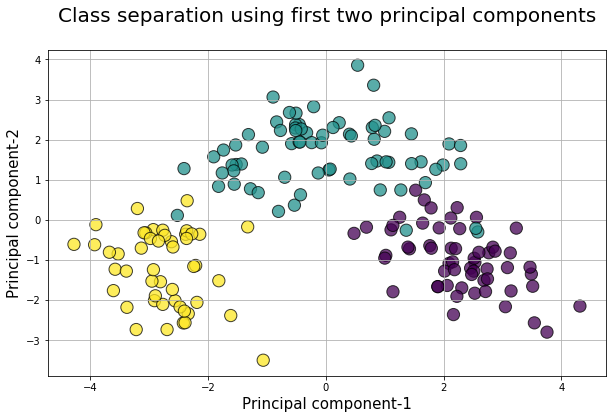

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

Conclusion: We were able to show that some correlation does exist between some of the features relative to the classes of wine. We used PCA to show that the first porincipal component explained 36% of the variance, and the second principal component explained an addition 20%. We considered those two components to explain 56% of the total variance and were able to show adequate class separation in the final scatter plot to visualize this. 